### Import all requared liabraries

In [1]:
# Impoerting required liabraries

import pandas as pd
import sys
import math
import numpy as np
from sklearn.model_selection import KFold
%matplotlib inline
import seaborn as sb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
from sklearn.preprocessing import OneHotEncoder
on=OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

#### chake version

In [2]:
# to show the version
print(pd.__version__)

1.5.3


#### load data

In [3]:
# Lets load the data file and read it
data_file=r'tested.csv'
td= pd.read_csv(data_file)


In [4]:
td.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
td.shape

(418, 12)

In [6]:
td.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [7]:
td.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [8]:
td.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [10]:
# Now check the duplicate values and delete them
td.duplicated().sum()

0

In [11]:
td.drop_duplicates(inplace=True)
td.duplicated().sum()

0

In [12]:
#chake null valu in data
td.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [13]:
td.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [14]:
#let's examine how many columns we will obtain after one hot encoding these variables
pd.get_dummies(td,drop_first=True).shape

(418, 864)

### examine PassengerId

In [15]:
td['PassengerId'].value_counts()

892     1
1205    1
1177    1
1176    1
1175    1
       ..
1028    1
1027    1
1026    1
1025    1
1309    1
Name: PassengerId, Length: 418, dtype: int64

In [16]:
td['PassengerId'].unique()

array([ 892,  893,  894,  895,  896,  897,  898,  899,  900,  901,  902,
        903,  904,  905,  906,  907,  908,  909,  910,  911,  912,  913,
        914,  915,  916,  917,  918,  919,  920,  921,  922,  923,  924,
        925,  926,  927,  928,  929,  930,  931,  932,  933,  934,  935,
        936,  937,  938,  939,  940,  941,  942,  943,  944,  945,  946,
        947,  948,  949,  950,  951,  952,  953,  954,  955,  956,  957,
        958,  959,  960,  961,  962,  963,  964,  965,  966,  967,  968,
        969,  970,  971,  972,  973,  974,  975,  976,  977,  978,  979,
        980,  981,  982,  983,  984,  985,  986,  987,  988,  989,  990,
        991,  992,  993,  994,  995,  996,  997,  998,  999, 1000, 1001,
       1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011, 1012,
       1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023,
       1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034,
       1035, 1036, 1037, 1038, 1039, 1040, 1041, 10

In [17]:
td['PassengerId'].isnull().sum()


0

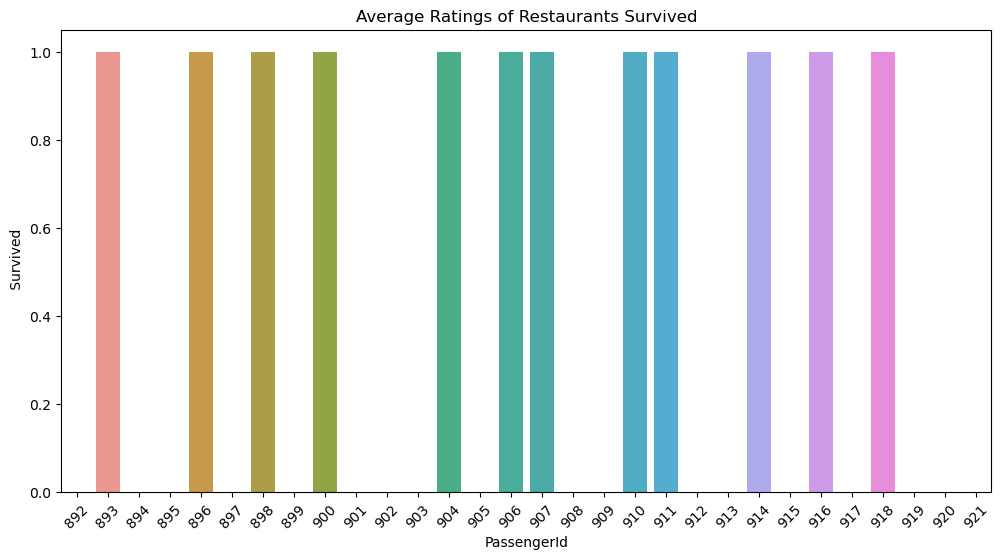

In [18]:
# Group by 'PassengerId' and calculate average Survived
average_ratings = td.groupby('PassengerId')['Survived'].mean().head(30)

# Convert the result to a DataFrame for better visualization
average_ratings_df = pd.DataFrame(average_ratings).reset_index()

# Set the figure size
plt.figure(figsize=(12, 6))

# Plot the bar plot using Seaborn
sns.barplot(data=average_ratings_df, x='PassengerId', y='Survived')
plt.xticks(rotation=45)
plt.xlabel('PassengerId')
plt.ylabel(' Survived')
plt.title('Average Ratings of Restaurants Survived')

# Display the plot
plt.show()


### examine Survived

In [19]:
td['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

In [20]:
td['Survived'].unique()

array([0, 1], dtype=int64)

In [21]:
td['Survived'].isnull().sum()


0

### examine Pclass

In [22]:
td['Pclass'].value_counts()

3    218
1    107
2     93
Name: Pclass, dtype: int64

In [23]:
td['Pclass'].unique()

array([3, 2, 1], dtype=int64)

In [24]:
td['Pclass'].isnull().sum()


0

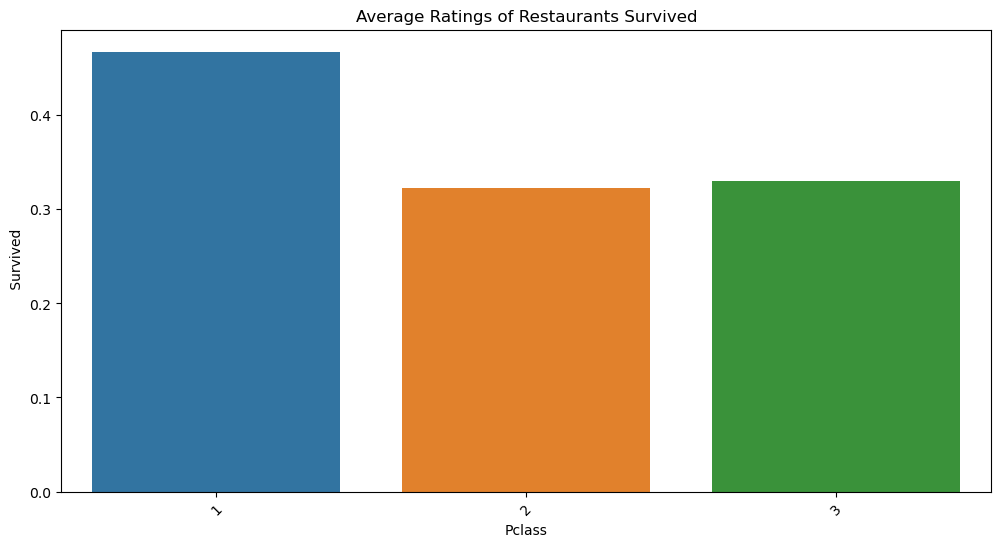

In [25]:
# Group by 'Locality' and calculate average ratings
average_ratings = td.groupby('Pclass')['Survived'].mean().head(30)

# Convert the result to a DataFrame for better visualization
average_ratings_df = pd.DataFrame(average_ratings).reset_index()

# Set the figure size
plt.figure(figsize=(12, 6))

# Plot the bar plot using Seaborn
sns.barplot(data=average_ratings_df, x='Pclass', y='Survived')
plt.xticks(rotation=45)
plt.xlabel('Pclass')
plt.ylabel(' Survived')
plt.title('Average Ratings of Restaurants Survived')

# Display the plot
plt.show()


### examine Name

In [96]:
td['Name'].value_counts()

KeyError: 'Name'

In [27]:
td['Name'].isnull().sum()


0

### examine Sex

In [28]:
td['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

In [29]:
td['Sex'].isnull().sum()


0

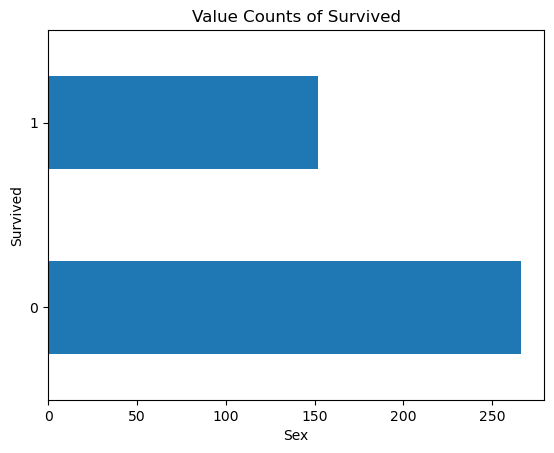

In [30]:
# now we just visulise Sex's data
td['Survived'].value_counts().plot(kind='barh')
plt.xlabel('Sex')
plt.ylabel('Survived')
plt.title('Value Counts of Survived')
plt.show()




In [31]:
td.loc[td["Sex"].isin(["male"]), "Sex"] = 1
td.loc[td["Sex"].isin(["female"]), "Sex"] = 2

                       

In [32]:
td["Sex"].value_counts()

1    266
2    152
Name: Sex, dtype: int64

In [33]:
sex_dummies=pd.get_dummies(td["Sex"],prefix="Sex")

C:\Users\HP\AppData\Local\Temp\ipykernel_1144\3323483945.py:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  sex_dummies=pd.get_dummies(td["Sex"],prefix="Sex")


In [34]:
sex_dummies.head()

,Sex_1,Sex_2
0,1,0
1,0,1
2,1,0
3,1,0
4,0,1


In [35]:
td=pd.concat([td,sex_dummies],1)
td=td.drop(["Sex"],1)

C:\Users\HP\AppData\Local\Temp\ipykernel_1144\3510993848.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  td=pd.concat([td,sex_dummies],1)
C:\Users\HP\AppData\Local\Temp\ipykernel_1144\3510993848.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  td=td.drop(["Sex"],1)


In [36]:
td.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Sex_1            uint8
Sex_2            uint8
dtype: object

### examine Age

In [37]:
td['Age'].value_counts()

21.0    17
24.0    17
22.0    16
30.0    15
18.0    13
        ..
76.0     1
28.5     1
22.5     1
62.0     1
38.5     1
Name: Age, Length: 79, dtype: int64

In [38]:
td['Age'].isnull().sum()


86

In [39]:
# Age : convert the dtype
td['Age'] = pd.to_numeric(td['Age'], errors='coerce')

In [40]:
td.dropna(subset=['Age'], inplace=True)


In [41]:
td['Age'].isnull().sum()


0

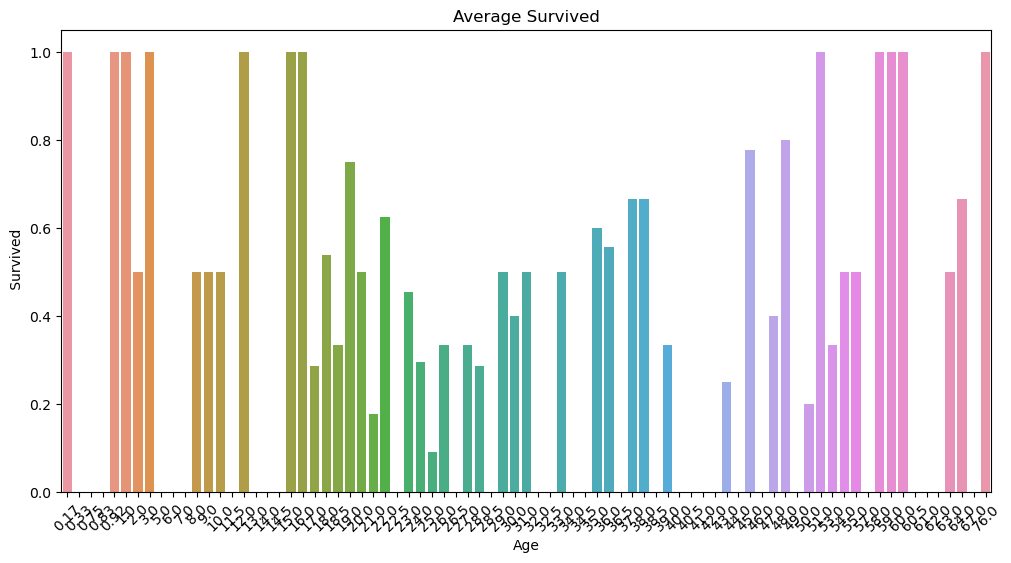

In [42]:
# Group by 'Age' and calculate average Survived
average_ratings = td.groupby('Age')['Survived'].mean()

# Convert the result to a DataFrame for better visualization
average_ratings_df = pd.DataFrame(average_ratings).reset_index()

# Set the figure size
plt.figure(figsize=(12, 6))

# Plot the bar plot using Seaborn
sns.barplot(data=average_ratings_df, x='Age', y='Survived')
plt.xticks(rotation=45)
plt.xlabel('Age')
plt.ylabel(' Survived')
plt.title('Average Survived')

# Display the plot
plt.show()


### examine SibSp


In [43]:
td['SibSp'].value_counts()

0    214
1     97
2     11
3      4
4      4
5      1
8      1
Name: SibSp, dtype: int64

In [44]:
td['SibSp'].isnull().sum()


0

In [97]:
td.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Sex_1            uint8
Sex_2            uint8
Embarked_01      uint8
Embarked_02      uint8
Embarked_03      uint8
dtype: object

### examine Parch


In [46]:
td['Parch'].value_counts()

0    247
1     50
2     29
3      3
4      1
6      1
5      1
Name: Parch, dtype: int64

In [47]:
td['Parch'].isnull().sum()


0

### examine Ticket

In [48]:
td['Ticket'].value_counts()

PC 17608              5
113503                4
SOTON/O.Q. 3101315    3
C.A. 31029            3
220845                3
                     ..
17475                 1
345763                1
SC/A4 23568           1
250651                1
SOTON/O.Q. 3101262    1
Name: Ticket, Length: 285, dtype: int64

In [49]:
td['Ticket'].isnull().sum()


0

### examine Fare

In [50]:
td['Fare'].value_counts()

26.0000     18
13.0000     17
10.5000     11
8.0500       9
7.7750       9
            ..
31.6792      1
15.0458      1
7.8208       1
8.5167       1
108.9000     1
Name: Fare, Length: 148, dtype: int64

In [51]:
td['Fare'].isnull().sum()


1

In [52]:
td.dropna(subset=['Fare'], inplace=True)


In [53]:
td['Fare'].isnull().sum()


0

In [54]:
# Fare : convert the dtype

td['Fare'] = pd.to_numeric(td['Fare'], errors='coerce')

In [55]:
td['Fare'].value_counts()

26.0000     18
13.0000     17
10.5000     11
8.0500       9
7.7750       9
            ..
31.6792      1
15.0458      1
7.8208       1
8.5167       1
108.9000     1
Name: Fare, Length: 148, dtype: int64

### examine Cabin

In [56]:
td['Cabin'].value_counts()

B57 B59 B63 B66    3
B45                2
C23 C25 C27        2
C116               2
C80                2
                  ..
E52                1
D30                1
E31                1
C62 C64            1
C105               1
Name: Cabin, Length: 72, dtype: int64

In [57]:
td['Cabin'].isnull().sum()


244

In [58]:
td.dropna(subset=['Cabin'], inplace=True)


In [59]:
td['Cabin'].isnull().sum()


0

### examine Embarked

In [60]:
td['Embarked'].value_counts()

C    47
S    39
Q     1
Name: Embarked, dtype: int64

In [61]:
td['Embarked'].isnull().sum()


0

In [62]:
td.loc[td["Embarked"].isin(["C"]), "Embarked"] = "01"
td.loc[td["Embarked"].isin(["S"]), "Embarked"] = "02"
td.loc[td["Embarked"].isin(["Q"]), "Embarked"] = "03"


In [63]:
td["Embarked"].value_counts()

01    47
02    39
03     1
Name: Embarked, dtype: int64

In [64]:
# making dummies
Embarked_dummies=pd.get_dummies(td["Embarked"],prefix="Embarked")

In [65]:
Embarked_dummies.head()

,Embarked_01,Embarked_02,Embarked_03
12,0,1,0
14,0,1,0
24,1,0,0
26,1,0,0
28,0,1,0


In [66]:
td=pd.concat([td,Embarked_dummies],1)
td=td.drop(["Embarked"],1)

C:\Users\HP\AppData\Local\Temp\ipykernel_1144\3910234095.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  td=pd.concat([td,Embarked_dummies],1)
C:\Users\HP\AppData\Local\Temp\ipykernel_1144\3910234095.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  td=td.drop(["Embarked"],1)


In [67]:
td 

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_1,Sex_2,Embarked_01,Embarked_02,Embarked_03
12,904,1,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",23.0,1,0,21228,82.2667,B45,0,1,0,1,0
14,906,1,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",47.0,1,0,W.E.P. 5734,61.1750,E31,0,1,0,1,0
24,916,1,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",48.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,0,1,1,0,0
26,918,1,1,"Ostby, Miss. Helene Ragnhild",22.0,0,1,113509,61.9792,B36,0,1,1,0,0
28,920,0,1,"Brady, Mr. John Bertram",41.0,0,0,113054,30.5000,A21,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404,1296,0,1,"Frauenthal, Mr. Isaac Gerald",43.0,1,0,17765,27.7208,D40,1,0,1,0,0
405,1297,0,2,"Nourney, Mr. Alfred (Baron von Drachstedt"")""",20.0,0,0,SC/PARIS 2166,13.8625,D38,1,0,1,0,0
407,1299,0,1,"Widener, Mr. George Dunton",50.0,1,1,113503,211.5000,C80,1,0,1,0,0
411,1303,1,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",37.0,1,0,19928,90.0000,C78,0,1,0,0,1


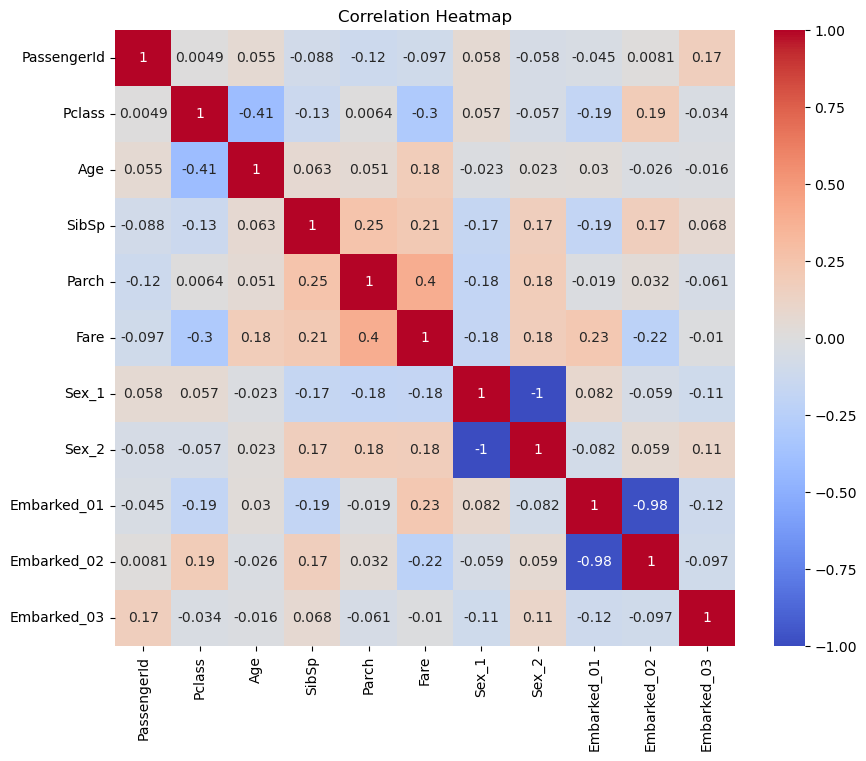

In [68]:
# Select the columns of interest
columns_of_interest = ['PassengerId','Pclass','Age','SibSp','Parch','Fare','Sex_1','Sex_2','Embarked_01','Embarked_02','Embarked_03']
subset_df = td[columns_of_interest]

# Compute the correlation matrix
correlation_matrix = subset_df.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()


In [69]:
td.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Sex_1            uint8
Sex_2            uint8
Embarked_01      uint8
Embarked_02      uint8
Embarked_03      uint8
dtype: object

### delete unwanted coloumn

In [70]:
del td["Name"]
del td["Ticket"]
del td["Cabin"]


In [71]:
td.shape

(87, 12)

In [72]:
td.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'Sex_1', 'Sex_2', 'Embarked_01', 'Embarked_02', 'Embarked_03'],
      dtype='object')

### Built Model


In [73]:
x = td.iloc[:, :-1].values
y = td.iloc[:, -1].values

In [74]:
x


array([[9.040000e+02, 1.000000e+00, 1.000000e+00, 2.300000e+01,
        1.000000e+00, 0.000000e+00, 8.226670e+01, 0.000000e+00,
        1.000000e+00, 0.000000e+00, 1.000000e+00],
       [9.060000e+02, 1.000000e+00, 1.000000e+00, 4.700000e+01,
        1.000000e+00, 0.000000e+00, 6.117500e+01, 0.000000e+00,
        1.000000e+00, 0.000000e+00, 1.000000e+00],
       [9.160000e+02, 1.000000e+00, 1.000000e+00, 4.800000e+01,
        1.000000e+00, 3.000000e+00, 2.623750e+02, 0.000000e+00,
        1.000000e+00, 1.000000e+00, 0.000000e+00],
       [9.180000e+02, 1.000000e+00, 1.000000e+00, 2.200000e+01,
        0.000000e+00, 1.000000e+00, 6.197920e+01, 0.000000e+00,
        1.000000e+00, 1.000000e+00, 0.000000e+00],
       [9.200000e+02, 0.000000e+00, 1.000000e+00, 4.100000e+01,
        0.000000e+00, 0.000000e+00, 3.050000e+01, 1.000000e+00,
        0.000000e+00, 0.000000e+00, 1.000000e+00],
       [9.260000e+02, 0.000000e+00, 1.000000e+00, 3.000000e+01,
        1.000000e+00, 0.000000e+00, 5.775

In [75]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
      dtype=uint8)

In [76]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15, random_state = 0)

In [77]:
# Splitting into Train and Test Sets
td_train, td_test= train_test_split(td, test_size=0.2, random_state=42)

In [78]:
x_test.shape


(14, 11)

In [79]:
y_train.shape

(73,)

In [80]:
print(x_train)

[[9.400000e+02 1.000000e+00 1.000000e+00 6.000000e+01 0.000000e+00
  0.000000e+00 7.629170e+01 0.000000e+00 1.000000e+00 1.000000e+00
  0.000000e+00]
 [9.650000e+02 0.000000e+00 1.000000e+00 2.850000e+01 0.000000e+00
  0.000000e+00 2.772080e+01 1.000000e+00 0.000000e+00 1.000000e+00
  0.000000e+00]
 [1.001000e+03 0.000000e+00 2.000000e+00 1.850000e+01 0.000000e+00
  0.000000e+00 1.300000e+01 1.000000e+00 0.000000e+00 0.000000e+00
  1.000000e+00]
 [1.179000e+03 0.000000e+00 1.000000e+00 2.400000e+01 1.000000e+00
  0.000000e+00 8.226670e+01 1.000000e+00 0.000000e+00 0.000000e+00
  1.000000e+00]
 [1.266000e+03 1.000000e+00 1.000000e+00 5.400000e+01 1.000000e+00
  1.000000e+00 8.185830e+01 0.000000e+00 1.000000e+00 0.000000e+00
  1.000000e+00]
 [1.088000e+03 0.000000e+00 1.000000e+00 6.000000e+00 0.000000e+00
  2.000000e+00 1.345000e+02 1.000000e+00 0.000000e+00 1.000000e+00
  0.000000e+00]
 [9.880000e+02 1.000000e+00 1.000000e+00 7.600000e+01 1.000000e+00
  0.000000e+00 7.885000e+01 0.000

In [81]:
print(y_train)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [82]:
print(x_test)

[[9.160000e+02 1.000000e+00 1.000000e+00 4.800000e+01 1.000000e+00
  3.000000e+00 2.623750e+02 0.000000e+00 1.000000e+00 1.000000e+00
  0.000000e+00]
 [9.560000e+02 0.000000e+00 1.000000e+00 1.300000e+01 2.000000e+00
  2.000000e+00 2.623750e+02 1.000000e+00 0.000000e+00 1.000000e+00
  0.000000e+00]
 [1.144000e+03 0.000000e+00 1.000000e+00 2.700000e+01 1.000000e+00
  0.000000e+00 1.367792e+02 1.000000e+00 0.000000e+00 1.000000e+00
  0.000000e+00]
 [1.076000e+03 1.000000e+00 1.000000e+00 2.700000e+01 1.000000e+00
  1.000000e+00 2.475208e+02 0.000000e+00 1.000000e+00 1.000000e+00
  0.000000e+00]
 [1.223000e+03 0.000000e+00 1.000000e+00 3.900000e+01 0.000000e+00
  0.000000e+00 2.970000e+01 1.000000e+00 0.000000e+00 1.000000e+00
  0.000000e+00]
 [1.023000e+03 0.000000e+00 1.000000e+00 5.300000e+01 0.000000e+00
  0.000000e+00 2.850000e+01 1.000000e+00 0.000000e+00 1.000000e+00
  0.000000e+00]
 [1.107000e+03 0.000000e+00 1.000000e+00 4.200000e+01 0.000000e+00
  0.000000e+00 4.250000e+01 1.000

In [83]:
print(y_test)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [84]:
x_train=td_train.drop(['Survived'],1)
y_train=td_train['Survived']
x_test=td_train.drop(['Survived'],1)
y_test=td_train['Survived']

C:\Users\HP\AppData\Local\Temp\ipykernel_1144\3831744837.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_train=td_train.drop(['Survived'],1)
C:\Users\HP\AppData\Local\Temp\ipykernel_1144\3831744837.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_test=td_train.drop(['Survived'],1)


In [85]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [86]:
x_train

array([[ 0.55753027, -0.29138576, -0.94242252,  0.7309634 , -0.57294631,
         0.70047452, -1.01459931,  1.01459931,  0.85146932, -0.82639387,
        -0.12126781],
       [ 1.38744731, -0.29138576, -0.5994523 , -1.00822538, -0.57294631,
         0.66822614, -1.01459931,  1.01459931,  0.85146932, -0.82639387,
        -0.12126781],
       [-1.24481481,  4.17652921, -1.01101656, -1.00822538, -0.57294631,
        -1.12657308,  0.98561076, -0.98561076, -1.17444044,  1.21007674,
        -0.12126781],
       [-0.62447278, -0.29138576,  0.90961667, -1.00822538, -0.57294631,
        -0.83156666,  0.98561076, -0.98561076,  0.85146932, -0.82639387,
        -0.12126781],
       [-0.19693976, -0.29138576, -1.49117487,  0.7309634 , -0.57294631,
        -0.48350154, -1.01459931,  1.01459931, -1.17444044,  1.21007674,
        -0.12126781],
       [-0.73345179, -0.29138576, -0.25648208, -1.00822538, -0.57294631,
        -0.17021888,  0.98561076, -0.98561076,  0.85146932, -0.82639387,
        -0.121

In [87]:
x_test

array([[ 0.55753027, -0.29138576, -0.94242252,  0.7309634 , -0.57294631,
         0.70047452, -1.01459931,  1.01459931,  0.85146932, -0.82639387,
        -0.12126781],
       [ 1.38744731, -0.29138576, -0.5994523 , -1.00822538, -0.57294631,
         0.66822614, -1.01459931,  1.01459931,  0.85146932, -0.82639387,
        -0.12126781],
       [-1.24481481,  4.17652921, -1.01101656, -1.00822538, -0.57294631,
        -1.12657308,  0.98561076, -0.98561076, -1.17444044,  1.21007674,
        -0.12126781],
       [-0.62447278, -0.29138576,  0.90961667, -1.00822538, -0.57294631,
        -0.83156666,  0.98561076, -0.98561076,  0.85146932, -0.82639387,
        -0.12126781],
       [-0.19693976, -0.29138576, -1.49117487,  0.7309634 , -0.57294631,
        -0.48350154, -1.01459931,  1.01459931, -1.17444044,  1.21007674,
        -0.12126781],
       [-0.73345179, -0.29138576, -0.25648208, -1.00822538, -0.57294631,
        -0.17021888,  0.98561076, -0.98561076,  0.85146932, -0.82639387,
        -0.121

### fix LogisticRegression model

In [88]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train, y_train)

LogisticRegression()

In [89]:
help(LogisticRegression)

Help on class LogisticRegression in module sklearn.linear_model._logistic:

class LogisticRegression(sklearn.linear_model._base.LinearClassifierMixin, sklearn.linear_model._base.SparseCoefMixin, sklearn.base.BaseEstimator)
 |  LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
 |  
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |  
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the
 |  cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag', 'saga' and 'newton-cg' solvers.)
 |  
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', 's

### chake accurasy

In [90]:
# Computing the accuracy:
from sklearn.metrics import accuracy_score
y_pred = classifier.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [91]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[35  0]
 [ 0 34]]


1.0

In [92]:
from sklearn.model_selection import cross_val_score

# Cross-validation
accuracy_scores = cross_val_score(classifier,x_test , y_test, cv=5)

# Compute mean accuracy
mean_accuracy = np.mean(accuracy_scores)

# Print accuracy scores and mean accuracy
print("Accuracy scores:", accuracy_scores)
print("Mean accuracy:", mean_accuracy)

Accuracy scores: [1. 1. 1. 1. 1.]
Mean accuracy: 1.0


In [93]:
# Use score method to get accuracy of model
score = classifier.score(x_test, y_test)
print(score)

1.0


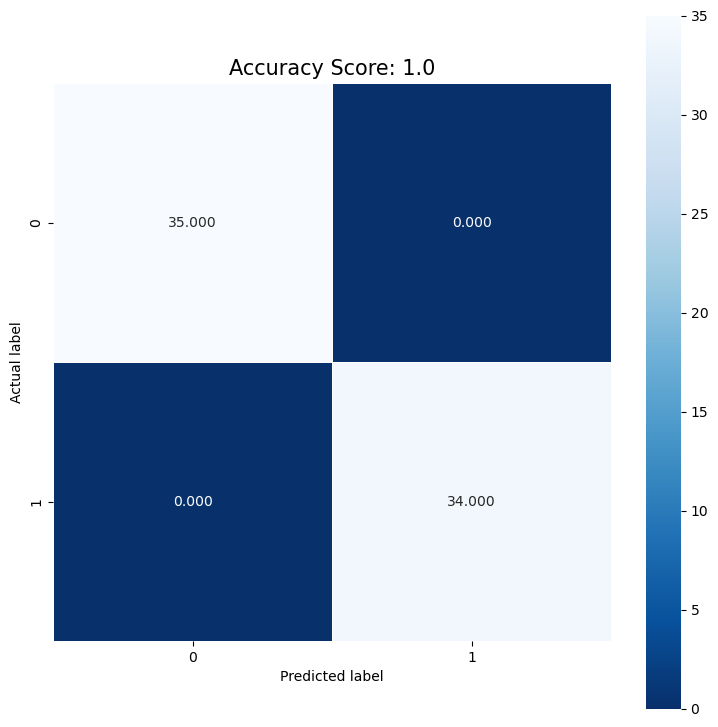

In [94]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [95]:
from sklearn.metrics import classification_report
target_names = ['Grid 1', 'Grid 2']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      Grid 1       1.00      1.00      1.00        35
      Grid 2       1.00      1.00      1.00        34

    accuracy                           1.00        69
   macro avg       1.00      1.00      1.00        69
weighted avg       1.00      1.00      1.00        69

